# Identity
Name: Michelle Nathania\
Student ID: 2702208575\
Code A (odd)

In [12]:
# Import needed libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle

After importing the dataset, we will take a look at the head and tail of the dataframe to understand the sample dataset.

In [13]:
# Import dataset
df = pd.read_csv("ObesityDataSet1.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,31,1.87,128.87,yes,yes,2.96,3.00,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II
1,Female,18,1.59,40.00,yes,yes,2.00,1.00,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight
2,Female,44 years,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
3,Male,31,1.68,102.00,yes,yes,2.94,2.14,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II
4,Male,22,1.74,75.00,yes,yes,3.00,3.00,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight


In [14]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1050,Female,19,1.62,69.98,yes,yes,2.25,2.75,Sometimes,no,2.33,no,0.82,0.024,no,Public_Transportation,Overweight_Level_I
1051,Male,27,1.78,113.15,yes,yes,2.22,3.00,Sometimes,no,2.09,no,0.55,1.743,Sometimes,Automobile,Obesity_Type_II
1052,Male,23,1.72,70.00,no,no,2.00,3.00,Sometimes,no,2.00,no,3.00,1.000,Frequently,Public_Transportation,Normal_Weight
1053,Male,21,1.86,89.56,yes,yes,2.00,3.00,Sometimes,no,1.01,no,0.00,0.798,Sometimes,Public_Transportation,Overweight_Level_I
1054,Male,22,1.74,94.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Obesity_Type_I


# Exploratory Data Analysis (EDA)
Exploratory Data Analysis is important to understand what is the nature of our data and understand the key preprocessing steps to be done. There will be several things to be checked:
- Number of rows and columns of the dataset
- Number of null
- Data type of each column
- Statistical descriptions of each numerical column
- Number of duplicated data
- Visual representation of numerical data (boxplot & histogram) to see the distribution clearly

## General Data Information

In [15]:
'''
The df.shape syntax will return 2 arguments,
the first index showing the number of rows, and the second showing the number of columns.
Example: [10, 24] means the data has 10 rows and 24 columns.
For better readability, I will call the df.shape[0] for rows and df.shape[1] for columns.
'''
print(f"# of rows: ", df.shape[0])
print(f"# of columns: ", df.shape[1])

# of rows:  1055
# of columns:  17


The dataset has 1055 rows and 17 columns.

In [16]:
# Check number of columns, non-null rows, data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1055 non-null   object 
 1   Age                             1055 non-null   object 
 2   Height                          1055 non-null   float64
 3   Weight                          1055 non-null   float64
 4   family_history_with_overweight  1055 non-null   object 
 5   FAVC                            1055 non-null   object 
 6   FCVC                            1055 non-null   float64
 7   NCP                             1055 non-null   float64
 8   CAEC                            1029 non-null   object 
 9   SMOKE                           1055 non-null   object 
 10  CH2O                            1055 non-null   float64
 11  SCC                             1055 non-null   object 
 12  FAF                             10

Some abnormalities found from df.info():
- Age is normally a numerical variable, but it is detected as object. This should be investigated further.
- There are several null data points found in CAEC (1029/1055 non-null) and TUE (1018/1055 non-null)

## Statistical Description

In [18]:
# Checking the numerical statistics
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1018.000000
mean,1.703175,86.674521,2.422701,2.719649,2.018114,1.033118,0.676977
std,0.095162,26.213231,0.529695,0.749590,0.613095,0.850566,0.603165
min,1.460000,39.370000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,65.135000,2.000000,2.765000,1.620000,0.160000,0.003250
50%,1.700000,83.150000,2.400000,3.000000,2.000000,1.000000,0.672500
75%,1.770000,107.125000,3.000000,3.000000,2.500000,1.730000,1.000000
max,1.980000,160.640000,3.000000,4.000000,3.000000,3.000000,2.000000


The statistical description of the data looks normal. All the categorical data ranges match the data description and the numerical variables like height and weight look normal from the range, especially since we are talking about obesity.

## Duplicated Data

In [19]:
# Check duplicated data
sum(df.duplicated())

9

There are 9 duplicated data points. To minimize redundance, we will drop the duplicated data points.

In [20]:
df = df.drop_duplicates()
df.shape

(1046, 17)

## Null Data

In [21]:
# Checking nulls again to make sure about the number of NAs
df.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                              26
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                               37
CALC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64

In [22]:
df.dropna().shape

(983, 17)

If dropping the NAs, the data will reduce from 1046 to 983. The percentage of NA is around 6% of the data, which is not too little but not too big. Having 983 data points is still considered okay so we will proceed with dropping the NA.

In [23]:
df = df.dropna()

## Categorical and Numerical Data

In [24]:
# Initializing empty lists to store the variables name
num = [] # numerical
cat = [] # categorical

# Dividing the variables into the corresponding list
for i in df.columns:
    if df[i].dtype == 'object' or i == 'loan_status': # Insert loan status to the cat variable because it's binary
        cat.append(i)
    else:
        num.append(i)

# Checking cardinality first
for i in cat:
  print(f"Column {i}")
  print(df[i].value_counts())
  print("")

Column Gender
Gender
Male      495
Female    488
Name: count, dtype: int64

Column Age
Age
26          103
18           92
23           91
21           90
19           82
22           78
20           75
24           47
25           42
31           31
17           30
30           22
27           21
29           20
33           16
39           14
34           14
37           13
32           11
28           10
40           10
38           10
41            9
35            9
16            8
42            4
18 years      4
21 years      3
36            3
44            2
26 years      2
43            2
55            2
44 years      1
56            1
19 years      1
22 years      1
61            1
23 years      1
52            1
20 years      1
51            1
45            1
47            1
32 years      1
33 years      1
Name: count, dtype: int64

Column family_history_with_overweight
family_history_with_overweight
yes    808
no     175
Name: count, dtype: int64

Column FAVC
FAVC
yes    861


Abnormality found:
- Age should be numerical but is labeled as object. It turns out that it is labeled as object because there are several values written as 'xx years' instead of just 'xx' so we will take care of that.

In [25]:
num

['Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [26]:
cat

['Gender',
 'Age',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

## Age Data Handling
We will replace the ' years' string to '' (empty) and convert the datatype from object to integer.

In [27]:
# Change age formatting and change from categorical to numerical
df['Age'] = df['Age'].str.replace(' years', '').astype(int)

## Deriving BMI (Body Mass Index)
Usually, the obesity case is linked with the BMI (Body Mass Index) which can be derived easily from Weight/Height^2. I have tried testing the data with just Weight & Height and with BMI. With Weight & Height, the accuracy is 0.94-0.95. But with BMI, we can reach 0.99 accuracy so I will derive the BMI.

In [28]:
df['BMI'] = df['Weight']/(df['Height']**2)
df = df.drop(['Weight', 'Height'], axis=1)

In [29]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,31,yes,yes,2.96,3.00,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II,36.852641
1,Female,18,yes,yes,2.00,1.00,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight,15.822159
2,Female,44,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I,30.457656
3,Male,31,yes,yes,2.94,2.14,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II,36.139456
4,Male,22,yes,yes,3.00,3.00,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight,24.772097


In [30]:
df.describe()

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,24.469990,2.427355,2.726582,2.008189,1.018779,0.683013,29.675755
std,6.455934,0.529840,0.743074,0.612716,0.855735,0.602587,8.106462
min,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998298
25%,20.000000,2.000000,2.765000,1.605000,0.130000,0.024000,24.156192
50%,23.000000,2.410000,3.000000,2.000000,1.000000,0.682000,28.659617
75%,26.000000,3.000000,3.000000,2.500000,1.695000,1.000000,36.089462
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.816933


In [31]:
# Initializing empty lists to store the variables name
num = [] # numerical
cat = [] # categorical

# Dividing the variables into the corresponding list
for i in df.columns:
    if df[i].dtype == 'object' or i == 'loan_status': # Insert loan status to the cat variable because it's binary
        cat.append(i)
    else:
        num.append(i)

# Checking cardinality first
for i in cat:
  print(f"Column {i}")
  print(df[i].value_counts())
  print("")

Column Gender
Gender
Male      495
Female    488
Name: count, dtype: int64

Column family_history_with_overweight
family_history_with_overweight
yes    808
no     175
Name: count, dtype: int64

Column FAVC
FAVC
yes    861
no     122
Name: count, dtype: int64

Column CAEC
CAEC
Sometimes     836
Frequently    108
Always         24
no             15
Name: count, dtype: int64

Column SMOKE
SMOKE
no     961
yes     22
Name: count, dtype: int64

Column SCC
SCC
no     943
yes     40
Name: count, dtype: int64

Column CALC
CALC
Sometimes     657
no            290
Frequently     36
Name: count, dtype: int64

Column MTRANS
MTRANS
Public_Transportation    728
Automobile               224
Walking                   25
Bike                       3
Motorbike                  3
Name: count, dtype: int64

Column NObeyesdad
NObeyesdad
Obesity_Type_I         161
Obesity_Type_III       151
Overweight_Level_II    140
Obesity_Type_II        138
Normal_Weight          136
Overweight_Level_I     130
Insufficie

## Numerical Data Plotting
We will use histogram and boxplot to see the data distribution and outliers.

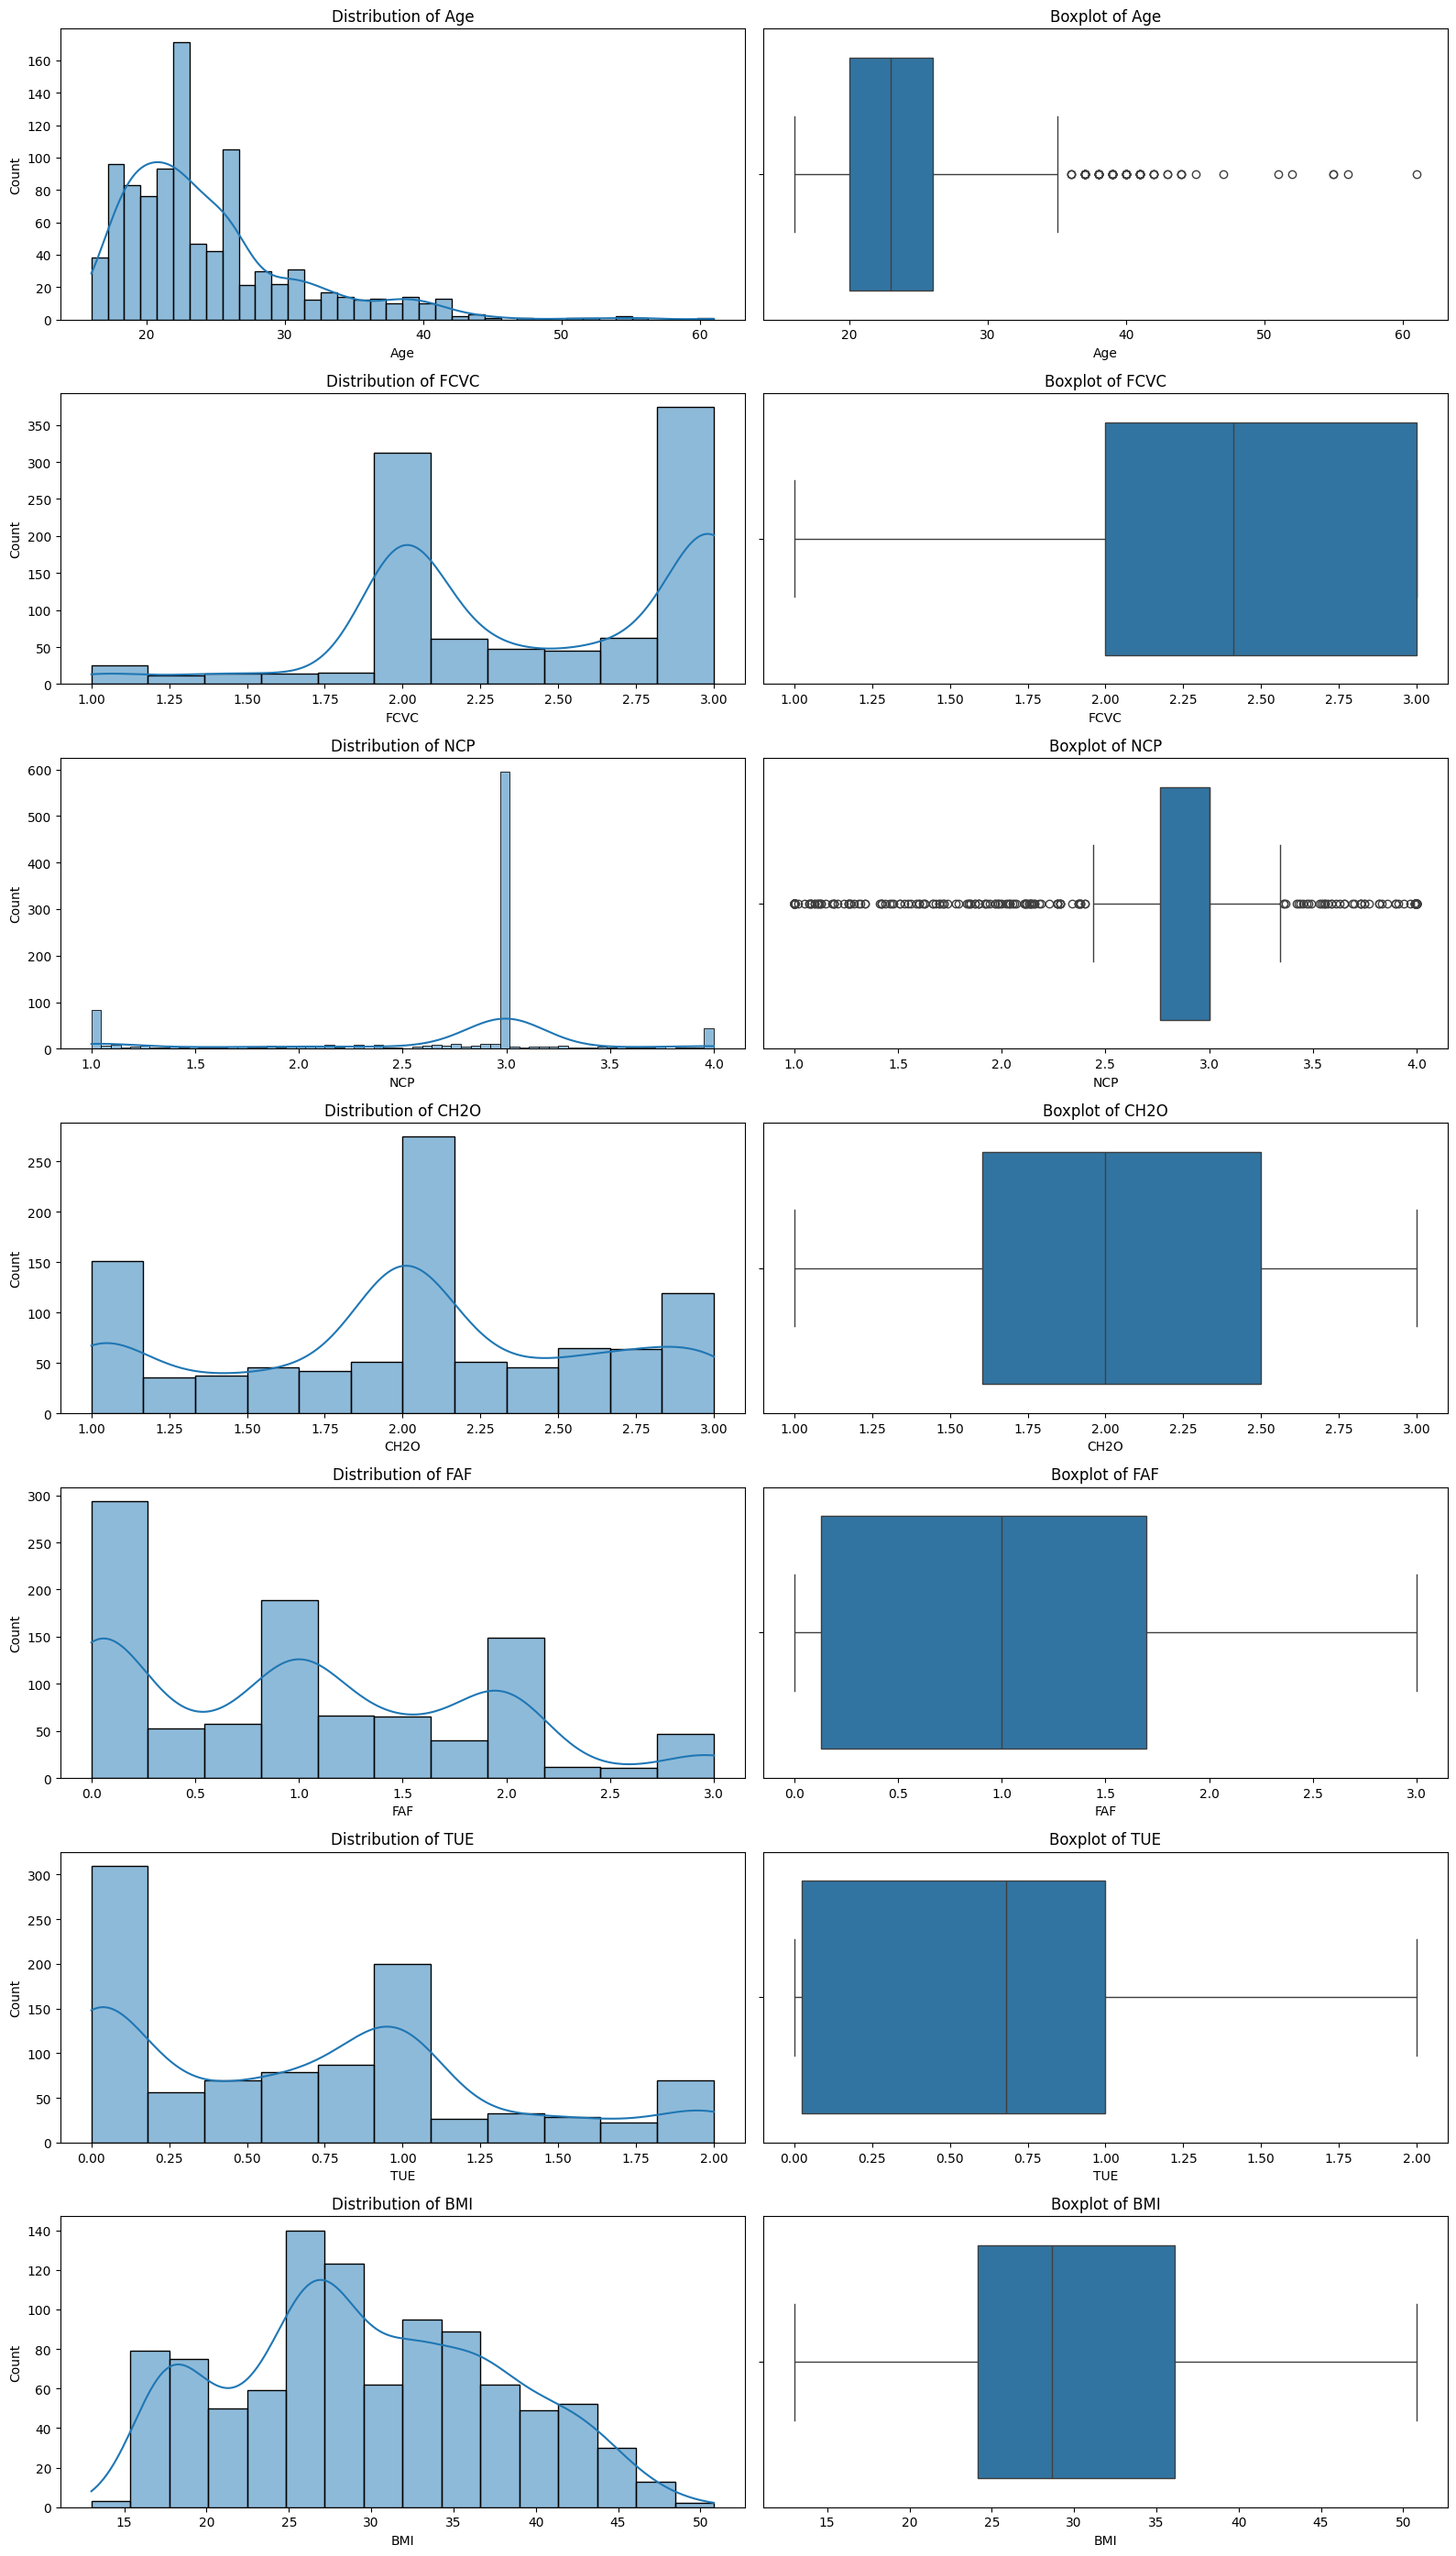

In [32]:
plt.figure(figsize=(16, 4 * len(num)))

for i, col in enumerate(num):
    plt.subplot(len(num), 2, 2*i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(len(num), 2, 2*i + 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Key findings:
- Age: Many outliers are present and the data is heavily right skewed. This means many people are categorized as young in this data.
- FCVC: Left skewed.
- NCP: Many outliers are present and the data is heavily left skewed.
- FAF: Right skewed.
- TUE: Right skewed.

In [33]:
# Check skewness
num_col = df[num]
num_col.skew()

Age     1.569257
FCVC   -0.455057
NCP    -1.184423
CH2O   -0.111452
FAF     0.476624
TUE     0.562409
BMI     0.150123
dtype: float64

Moderate skewness: FA, TUE, FCVC\
Heavy skewness: Age, NCP

# Data Preprocessing
- Mapping
	- Gender: Male(0), Female (1)
	- family_history_with_overweight: no (0), yes (1)
	- FAVC: no (0), yes (1)
	- CAEC: no (0), Sometimes (1), Frequently (2), Always (3)
	- CALC: no (0), Sometimes (1), Frequently (2)
	- SMOKE: no (0), yes (1)
	- SCC: no (0), yes (1)
	- NObeyesdad: Insufficient_Weight (0), Normal_Weight (1), Overweight_Level_I (2), Overweight_Level_II (3), Obesity_Type_I (4), Obesity_Type_II (5), Obesity_Type_III (6)
- One Hot Encoding
	- MTRANS

In [34]:
# Gender mapping
def gender_map(x):
    if x == 'Male':
        return 0 # Male (0)
    else:
        return 1 # Female (1)
    

df['Gender'] = df['Gender'].apply(gender_map)

In [35]:
# Binary mapping Yes-No
def yes_no_map(x):
    if x == 'no':
        return 0
    else:
        return 1
    
col = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for c in col:
    df[c] = df[c].apply(yes_no_map)

In [36]:
# Other mapping
def caec_map(x):
    if x == 'no':
        return 0
    elif x == 'Sometimes':
        return 1
    elif x == 'Frequently':
        return 2
    else:
        return 3

col = ['CAEC', 'CALC']
for c in col:
    df[c] = df[c].apply(caec_map)

In [37]:
# Obesity level mapping
def obesity_map(x):
    if x == 'Insufficient_Weight':
        return 0
    elif x == 'Normal_Weight':
        return 1
    elif x == 'Overweight_Level_I':
        return 2
    elif x == 'Overweight_Level_II':
        return 3
    elif x == 'Obesity_Type_I':
        return 4
    elif x == 'Obesity_Type_II':
        return 5
    elif x == 'Obesity_Type_III':
        return 6
    
df['NObeyesdad'] = df['NObeyesdad'].apply(obesity_map)

In [38]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,31,1,1,2.96,3.00,1,1,1.28,0,0.90,1.875,1,Automobile,5,36.852641
1,1,18,1,1,2.00,1.00,2,0,1.00,0,0.00,2.000,0,Public_Transportation,0,15.822159
2,1,44,1,1,2.00,3.00,1,0,2.81,0,0.00,0.000,1,Automobile,4,30.457656
3,0,31,1,1,2.94,2.14,1,0,1.25,0,1.18,0.778,0,Public_Transportation,5,36.139456
4,0,22,1,1,3.00,3.00,2,0,1.00,0,1.00,0.000,0,Automobile,1,24.772097


## Data Splitting
Split X and y and split again to train and test data.

In [39]:
# X and y
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [40]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data: {X_train.shape[0]}")
print(f"Testing data: {X_test.shape[0]}")

Training data: 786
Testing data: 197


We split the train/test with 80/20 ratio to get the most of our train data while still having sufficient test data.

## One Hot Encoding
One hot encoding is done after train test split because we want the encoder to only learn (fit) from the train data and apply the learning (transform) on both train and test data. This measure is done to prevent data leakage for unforeseen conditions.

In [41]:
# One hot encoding
to_encode = ['MTRANS']
ohe = OneHotEncoder(sparse_output=False)
encoder_ohe = ohe.fit_transform(X_train[to_encode])
encoded_df = pd.DataFrame(encoder_ohe, columns=(ohe.get_feature_names_out(to_encode)), index=X_train.index)
X_train = pd.concat([X_train, encoded_df], axis=1)
X_train = X_train.drop(to_encode, axis = 1)

# Check the new data after OHE
X_train.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
568,1,26,1,1,3.0,3.0,1,0,2.22,0,0.00,0.481,1,41.906722,0.0,0.0,0.0,1.0,0.0
351,1,39,1,1,2.0,3.0,1,0,2.53,0,0.27,0.806,1,25.502049,1.0,0.0,0.0,0.0,0.0
951,1,26,1,1,3.0,3.0,1,0,1.03,0,0.07,0.991,1,39.469928,0.0,0.0,0.0,1.0,0.0
558,1,23,0,1,2.0,4.0,2,0,2.00,0,2.00,1.000,1,20.312500,1.0,0.0,0.0,0.0,0.0
346,1,39,1,1,2.0,3.0,1,0,1.00,0,0.00,0.000,1,34.062222,1.0,0.0,0.0,0.0,0.0


In [42]:
# One hot encoding for test dataset
encoder_ohe_test = ohe.transform(X_test[to_encode])
encoded_df_test = pd.DataFrame(encoder_ohe_test, columns=(ohe.get_feature_names_out(to_encode)), index=X_test.index)
X_test = pd.concat([X_test, encoded_df_test], axis=1)
X_test = X_test.drop(to_encode, axis = 1)

# Check the new data after OHE
X_test.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
867,1,21,1,1,3.00,3.0,1,0,1.42,0,1.70,0.931,1,44.070968,0.0,0.0,0.0,1.0,0.0
856,0,22,1,1,2.06,3.0,1,0,2.89,0,0.90,0.145,1,32.263972,0.0,0.0,0.0,1.0,0.0
870,0,18,1,1,2.00,3.0,1,0,2.00,0,3.00,0.000,1,22.222222,1.0,0.0,0.0,0.0,0.0
526,1,20,1,1,3.00,3.0,1,0,2.41,0,1.92,0.928,1,46.479894,0.0,0.0,0.0,1.0,0.0
72,0,25,1,1,2.64,3.0,1,0,2.74,0,2.00,0.501,1,36.125295,0.0,0.0,0.0,1.0,0.0


## Scaling
We will use RobustScaler because most data is skewed and some have outliers. RobustScaler can handle these well.

In [43]:
# Scaling for all X variables
rs = RobustScaler()

# only scale numerical variables
X_train[num] = rs.fit_transform(X_train[num]) # fit transform on train
X_test[num] = rs.transform(X_test[num]) # only transform on test -> prevent data leakage

In [44]:
X_train.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
568,1,0.500000,1,1,0.6,0.000000,1,0,0.255814,0,-0.633914,-0.205430,1,1.112122,0.0,0.0,0.0,1.0,0.0
351,1,2.666667,1,1,-0.4,0.000000,1,0,0.616279,0,-0.462758,0.127561,1,-0.283301,1.0,0.0,0.0,0.0,0.0
951,1,0.500000,1,1,0.6,0.000000,1,0,-1.127907,0,-0.589540,0.317111,1,0.904842,0.0,0.0,0.0,1.0,0.0
558,1,0.000000,0,1,-0.4,4.040404,2,0,0.000000,0,0.633914,0.326332,1,-0.724737,1.0,0.0,0.0,0.0,0.0
346,1,2.666667,1,1,-0.4,0.000000,1,0,-1.162791,0,-0.633914,-0.698258,1,0.444849,1.0,0.0,0.0,0.0,0.0


# Modeling
Two classification models will be used: RandomForestClassifier and XGBClassifier.

## Random Forest Classifier

In [45]:
# Training random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
lb = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
          'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
          'Obesity_Type_III']

print("Classification Report Random Forest")
print(classification_report(y_test, y_pred, target_names=lb))

Classification Report Random Forest
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.97      0.98        33
      Normal_Weight       0.93      1.00      0.96        27
 Overweight_Level_I       1.00      0.96      0.98        27
Overweight_Level_II       1.00      1.00      1.00        31
     Obesity_Type_I       1.00      1.00      1.00        22
    Obesity_Type_II       1.00      1.00      1.00        28
   Obesity_Type_III       1.00      1.00      1.00        29

           accuracy                           0.99       197
          macro avg       0.99      0.99      0.99       197
       weighted avg       0.99      0.99      0.99       197



**Best Model**\
The 99% accuracy indicates that the model correctly predicted the weight status for 99% of the instances in the test set. This is an exceptionally high accuracy, suggesting the model performs very well overall. Looking at the precision, the normal weight class has the lowest precision but is still good with 93% precision, this may occur when several classes are misclassified as Normal Weight. And if we see on the recall, the lowest are insufficient weight and overweight level 1 which are close to normal weight class. The two classes can be misclassified as normal weight. But overall, this model is performing well on all classes.

## XGB Classifier

In [46]:
# Training  XGB
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Classification XGB")
print(classification_report(y_test, y_pred, target_names=lb))

Classification XGB
                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.97      0.97        33
      Normal_Weight       0.96      0.96      0.96        27
 Overweight_Level_I       0.96      0.96      0.96        27
Overweight_Level_II       0.97      0.97      0.97        31
     Obesity_Type_I       1.00      1.00      1.00        22
    Obesity_Type_II       0.90      1.00      0.95        28
   Obesity_Type_III       1.00      0.90      0.95        29

           accuracy                           0.96       197
          macro avg       0.97      0.97      0.97       197
       weighted avg       0.97      0.96      0.96       197



This model correctly classified 96% of the instances in the test set. This is a very high accuracy, indicating strong overall performance. The precision and recall have slightly lower performance compared to Random Forest model, suggesting that this model, while good, still struggles with differentiating similar classes. Overall, the XGBoost model delivers highly accurate and reliable classifications, with very strong performance across most weight categories. The slight areas for improvement lie in correctly identifying all Obesity_Type_III individuals and avoiding misclassifying others as Obesity_Type_II.

# Feature Importances

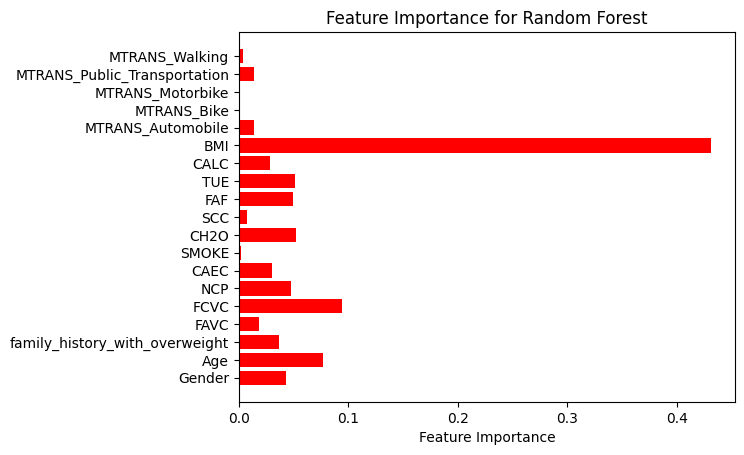

In [47]:
# Find the feature importances
importances = rf.feature_importances_

# Plot the feature importances
plt.barh(X_train.columns, importances, color='r')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.show()

This bar chart illustrates the relative importance of each feature in your Random Forest model for predicting obesity levels. 'BMI' is overwhelmingly the most important feature, confirming its critical role in classification. 'FCVC' (frequency of consumption of vegetables) also stands out as influential, followed closely by 'Age'. Other features contributing moderately include 'family_history_with_overweight', 'NCP' (number of main meals), and 'CH2O' (consumption of water daily). In contrast, transportation modes ('MTRANS' categories), 'SMOKE', 'CALC' (consumption of alcohol), and 'SCC' (calories consumption monitoring) show relatively lower importance, suggesting these factors had less impact on the Random Forest model's predictive decisions in this dataset.

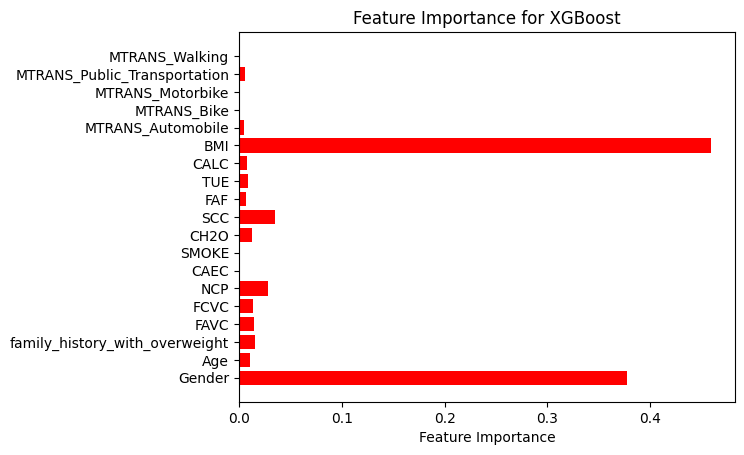

In [52]:
# Find the feature importances
importances = xgb.feature_importances_

# Plot the feature importances
plt.barh(X_train.columns, importances, color='r')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for XGBoost')
plt.show()

This bar chart illustrates the relative importance of each feature in your XGBoost model for predicting obesity levels. Dominating the chart are 'BMI' and 'Gender', indicating they are by far the most influential factors the model uses to make classifications, which aligns well with medical understanding of obesity drivers. Other features like 'family_history_with_overweight', 'FAVC' (frequent consumption of high caloric food), 'NCP' (number of main meals), 'SCC' (calories consumption monitoring), and 'CH2O' (consumption of water daily) also contribute moderately, highlighting the significance of genetic predispositions and eating habits. In contrast, transportation modes ('MTRANS' categories), 'TUE' (time using technology devices), 'FAF' (physical activity frequency), and 'SMOKE' show relatively low importance, suggesting they provide less unique predictive power to this model given the presence of stronger features.

# Save to pickle
The best model is Random Forest Classifier, so the model, scaler, and encoder will be saved as pkl files to be used in deployment.

In [48]:
# Save the best model as pkl
with open('obesity_rf.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [49]:
# Save scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(rs, file)

In [50]:
# Save one hot encoder
with open("encoder.pkl", "wb") as file:
    pickle.dump(ohe, file)

In [51]:
# Save mapping dict
mapping = {
    'person_gender': {'Male': 0, 'Female': 1},
    'caec': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'yes_no': {'yes': 1, 'no': 0}
}

with open("mapping.pkl", "wb") as f:
    pickle.dump(mapping, f)